In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from plotly import graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train = np.array([[2, -1], [-3, -1], [1, 8], [4, 1]])
y_train = np.array([5, 2, 7, 4])
X_test = np.array([[3, -3]])
y_test = np.array([4])

In [ ]:
X_train

array([[ 2, -1],
       [-3, -1],
       [ 1,  8],
       [ 4,  1]])

In [ ]:
# X, y = make_regression(n_samples=100, n_features=2, random_state=42)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

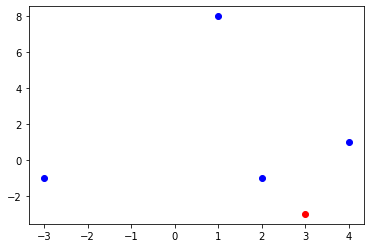

In [ ]:
plt.scatter(*zip(*X_train), c="b")
plt.scatter(*zip(*X_test), c="r")

Without pca

In [ ]:
ss = StandardScaler(with_std=False).fit(X_train)
X_train_c = ss.transform(X_train)
X_train_c


array([[ 1.  , -2.75],
       [-4.  , -2.75],
       [ 0.  ,  6.25],
       [ 3.  , -0.75]])

In [ ]:
X_test_c = ss.transform(X_test)
X_test_c

array([[ 2.  , -4.75]])

In [ ]:
reg = LinearRegression()
reg.fit(X_train_c, y_train)
mean_absolute_error(y_train, reg.predict(X_train_c)), mean_absolute_error(y_test, reg.predict(X_test_c))

(0.7319819819819823, 0.7045045045045044)

In [ ]:
reg.intercept_, reg.coef_

(4.5, array([0.26216216, 0.36396396]))

With 2 compobnents

In [ ]:
pca = PCA(n_components=2)
Z_train = pca.fit_transform(X_train_c)
reg.fit(Z_train, y_train)
Z_test = pca.transform(X_test_c)
mean_absolute_error(y_train, reg.predict(Z_train)), mean_absolute_error(y_test, reg.predict(Z_test))

(0.7319819819819819, 0.7045045045045049)

In [ ]:
pca.transform([reg.coef_])

array([[-0.10174005, -0.43686122]])

With 1 component

In [ ]:
pca = PCA(n_components=1, random_state=42)
Z_train = pca.fit_transform(X_train_c)
reg.fit(Z_train, y_train)
Z_test = pca.transform(X_test_c)
mean_absolute_error(y_train, reg.predict(Z_train)), mean_absolute_error(y_test, reg.predict(Z_test))

(0.760461788672666, 1.241537709759359)